In [18]:
!pip install tensorflow --quiet

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Dense,Dropout,Flatten

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [3]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [4]:
import matplotlib.pyplot as plt

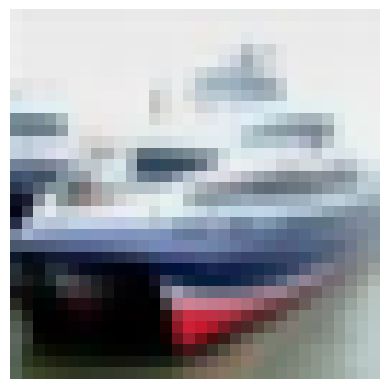

In [6]:
plt.imshow(x_test[1])
plt.axis('off')
plt.show()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_6292\831121413.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(y_test[i]))


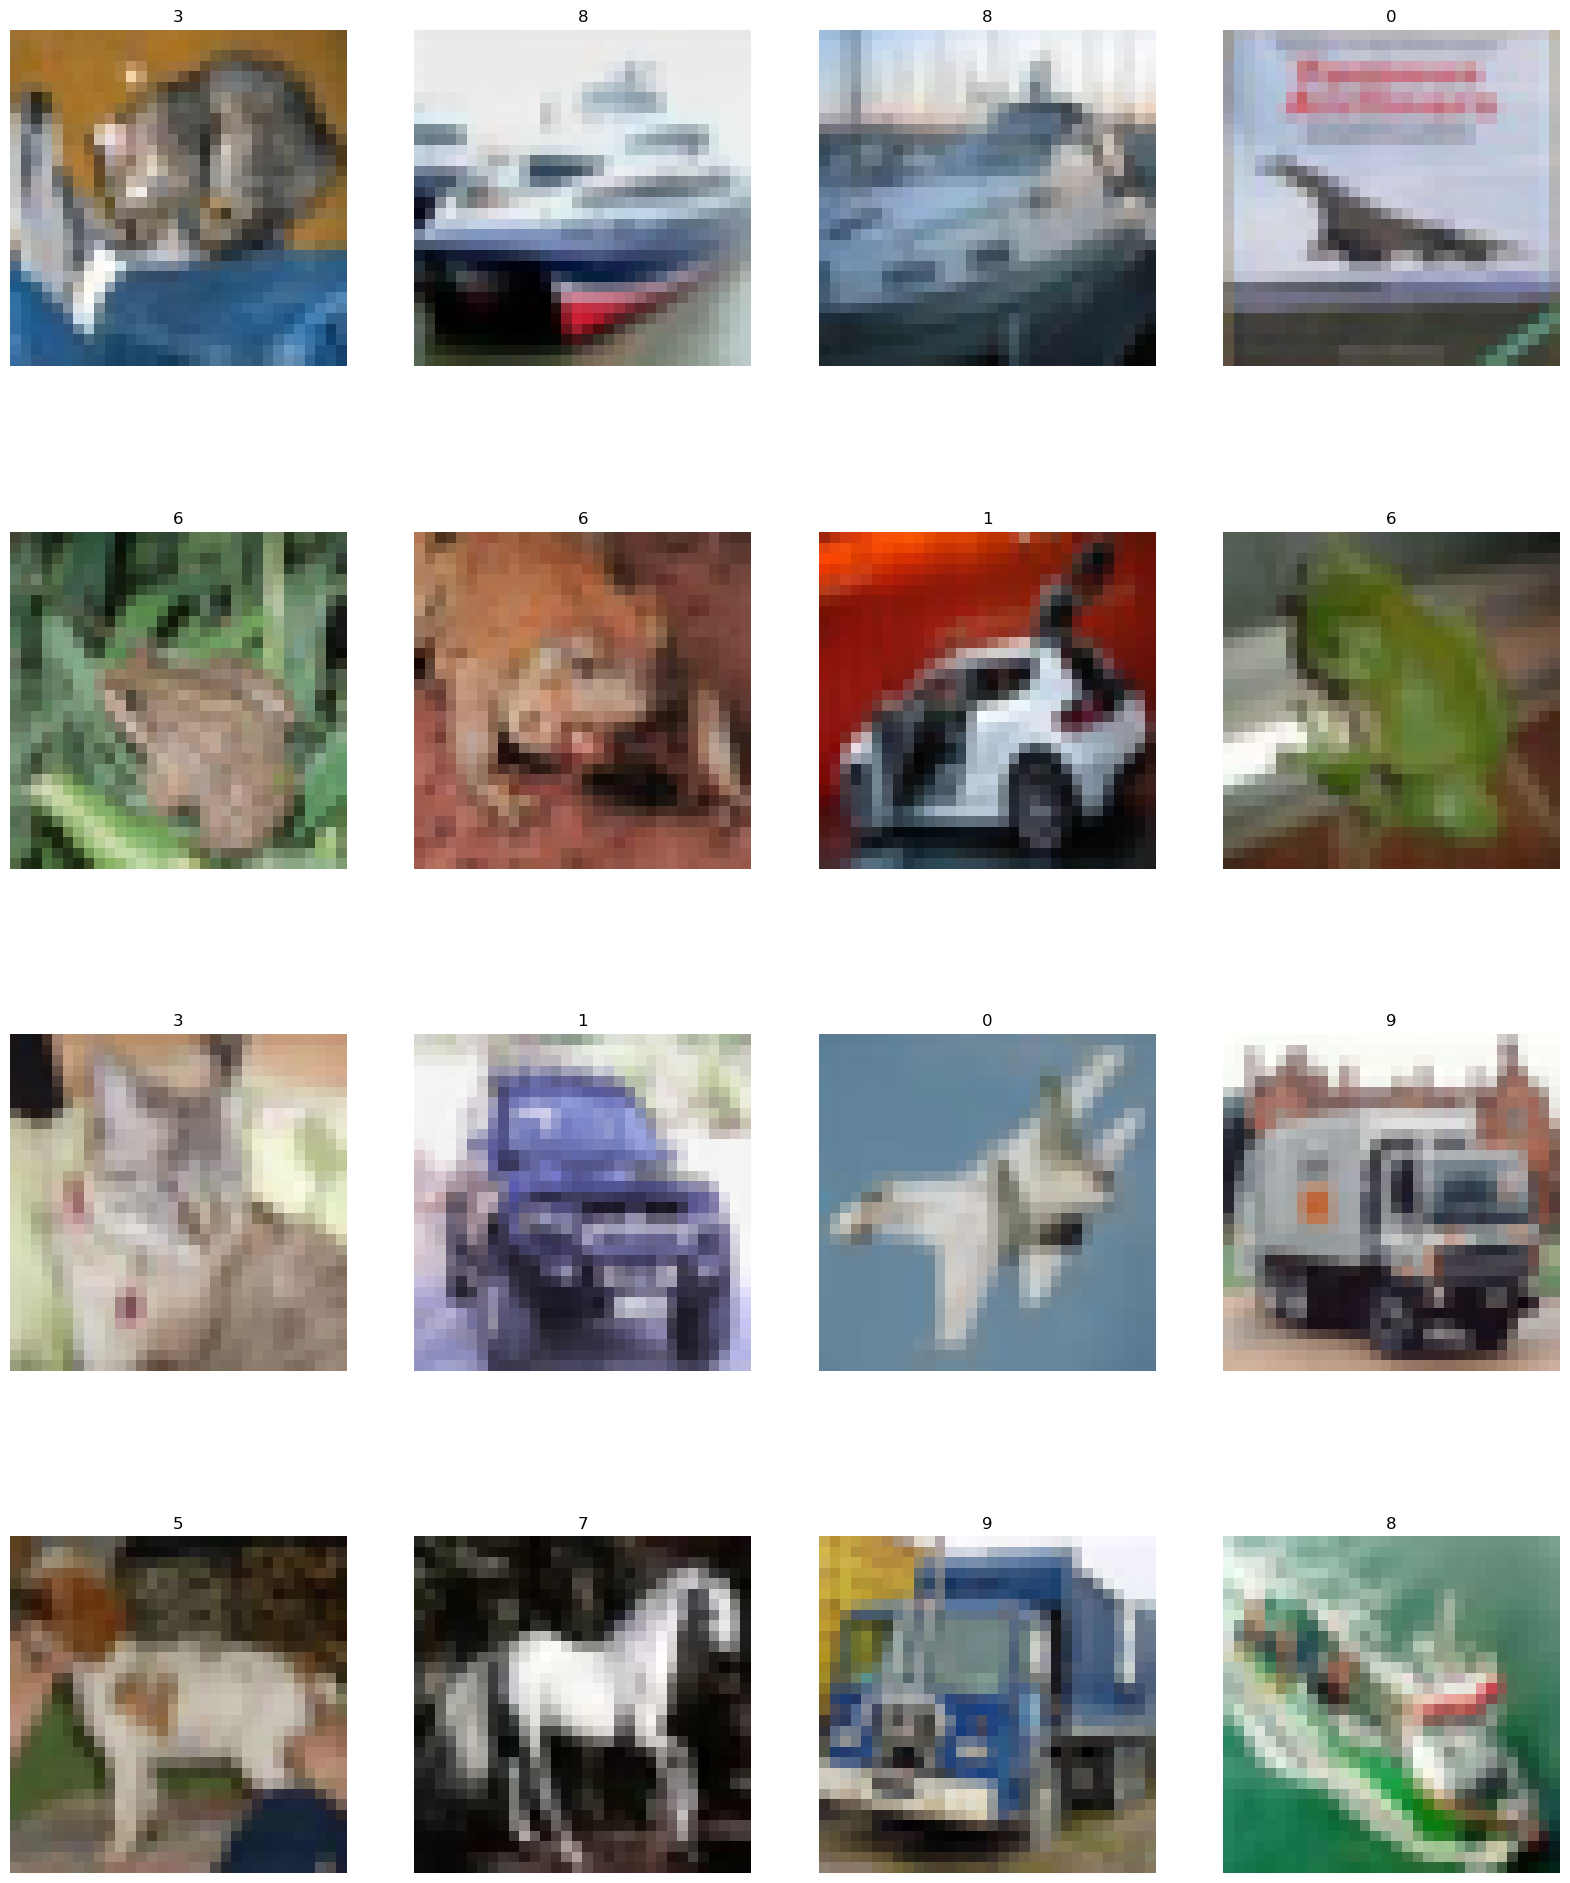

In [8]:
plt.figure(figsize=(20,25))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i])
    plt.title(int(y_test[i]))
    plt.axis('off')
plt.show()    

In [15]:
from tf.keras.model import Sequential

ModuleNotFoundError: No module named 'tf'

In [22]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',
           padding='same',input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(10,activation='softmax')
          
])

C:\Users\ELCOT\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.1)

Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 439s 432ms/step - accuracy: 0.4227 - loss: 1.5880 - val_accuracy: 0.5712 - val_loss: 1.2312
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 225s 318ms/step - accuracy: 0.5627 - loss: 1.2304 - val_accuracy: 0.6224 - val_loss: 1.0858
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 220s 256ms/step - accuracy: 0.6145 - loss: 1.0816 - val_accuracy: 0.6650 - val_loss: 0.9531
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 171s 212ms/step - accuracy: 0.6484 - loss: 0.9938 - val_accuracy: 0.6934 - val_loss: 0.8997
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 240s 265ms/step - accuracy: 0.6752 - loss: 0.9247 - val_accuracy: 0.6846 - val_loss: 0.8798


In [28]:
loss,acc=model.evaluate(x_test,y_test)
print(loss)
print(acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6757 - loss: 0.9121 
0.9120619893074036
0.6757000088691711


In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image


In [32]:
img=input('Enter the Name Of Image')
pic=image.load_img(img,target_size=(32,32))
img_array=image.img_to_array(pic)
img_array=img_array/255.0
img_array=np.expand_dims(img_array,axis=0)
#prediction
prediction=model.predict(img_array)
pred_class=np.argmax(prediction)
class_sentences = [
    "This is an airplane",
    "This is a car",
    "This is a bird",
    "This is a cat",
    "This is a deer",
    "This is a dog",
    "This is a frog",
    "This is a horse",
    "This is a ship",
    "This is a truck"
]
print('predicted class:',class_sentences[pred_class])


Enter the Name Of Image download.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
predicted class: This is a car
